In [53]:
from pathlib import Path
import cv2

In [54]:
# HOME = Path.home()
HOME = Path("/mnt/d/Jupyter-Goodyoung")
dataset = HOME / "diabetes/data/"
TRAIN = dataset / "Train"
VALID = dataset / "Valid"

### Data load

In [55]:
# 파일에서 문자열을 읽어와 리스트에 저장하는 함수
def read_strings_from_file(filename):
    strings = []
    with open(filename, 'r') as f:
        for line in f:
            strings.append(line.strip())  # 줄바꿈 문자 제거
    return strings
TL_files = read_strings_from_file('TL_files.txt')
TS_files = read_strings_from_file('TS_files.txt')

### Check Label unique value

In [40]:
from collections import defaultdict

In [6]:
with open("menu.json", "r") as f:
    menu= json.load(f)
    
result = defaultdict()
classification = {
    'A':[],
    'B':[],
    'C':[],
    'D':[],
}
idx = 0
for file_path in TS_files:
    img_name = file_path.split("/")[-1]
    print(img_name)
    big = img_name.split("_")[0]
    code = img_name.split("_")[2]
    value = img_name.split("_")[3]
    
    if code in result:
        pass
    else:
        result[code] = (idx,value) # idx: class label
        idx += 1
        
    if value not in classification[big]:
        classification[big].append(value)

A_13_A13001_가자미구이_30_09.jpg
A_13_A13001_가자미구이_30_10.jpg
A_13_A13001_가자미구이_30_01.jpg
A_13_A13001_가자미구이_30_02.jpg
A_13_A13001_가자미구이_30_03.jpg
A_13_A13001_가자미구이_30_04.jpg
A_13_A13001_가자미구이_30_05.jpg
A_13_A13001_가자미구이_30_06.jpg
A_13_A13001_가자미구이_30_07.jpg
A_13_A13001_가자미구이_30_08.jpg
A_13_A13002_개불_24_09.jpg
A_13_A13002_개불_24_10.jpg
A_13_A13002_개불_24_01.jpg
A_13_A13002_개불_24_02.jpg
A_13_A13002_개불_24_03.jpg
A_13_A13002_개불_24_04.jpg
A_13_A13002_개불_24_05.jpg
A_13_A13002_개불_24_06.jpg
A_13_A13002_개불_24_07.jpg
A_13_A13002_개불_24_08.jpg
A_13_A13003_광어회_02_09.jpg
A_13_A13003_광어회_02_10.jpg
A_13_A13003_광어회_02_01.jpg
A_13_A13003_광어회_02_02.jpg
A_13_A13003_광어회_02_03.jpg
A_13_A13003_광어회_02_04.jpg
A_13_A13003_광어회_02_05.jpg
A_13_A13003_광어회_02_06.jpg
A_13_A13003_광어회_02_07.jpg
A_13_A13003_광어회_02_08.jpg
A_13_A13003_광어회_09_09.jpg
A_13_A13003_광어회_09_10.jpg
A_13_A13003_광어회_09_01.jpg
A_13_A13003_광어회_09_02.jpg
A_13_A13003_광어회_09_03.jpg
A_13_A13003_광어회_09_04.jpg
A_13_A13003_광어회_09_05.jpg
A_13_A13003_광어회_09_06.jpg
A_

In [8]:
len(result) # 고유 값이 761개

761

In [9]:
result

defaultdict(None,
            {'A13001': (0, '가자미구이'),
             'A13002': (1, '개불'),
             'A13003': (2, '광어회'),
             'A13004': (3, '나주곰탕'),
             'A13005': (4, '낙지탕탕이'),
             'A13006': (5, '낙지호롱'),
             'A13007': (6, '내장볶음'),
             'A13008': (7, '대구뽈찜'),
             'A13009': (8, '대구탕'),
             'A13010': (9, '대하구이'),
             'A13011': (10, '대하찜'),
             'A13012': (11, '막회'),
             'A13013': (12, '멍게(활)'),
             'A13015': (13, '물갈비'),
             'A13016': (14, '물회'),
             'A13017': (15, '반계탕'),
             'A13018': (16, '북어찜'),
             'A13020': (17, '소라숙회'),
             'A13021': (18, '술국'),
             'A13022': (19, '아바이순대'),
             'A13023': (20, '알내장탕'),
             'A13024': (21, '어탕국수'),
             'A13025': (22, '얼큰황태우거지탕'),
             'A13026': (23, '오징어회'),
             'A13027': (24, '장어탕'),
             'A13029': (25, '초계국수'),
             'A13031': (26, '추어만두'),


### 고유값 분석

In [7]:
# classification['A']

classification['B']

# classification['C']

# classification['D']

['BLT샌드위치',
 '간장반후라이드반치킨(뼈)',
 '간장치킨(뼈)',
 '갈비치킨',
 '감자토스트',
 '계란토스트',
 '고구마피자(씬)',
 '곱창떡볶이',
 '김치알컵밥',
 '김치참치마요컵밥',
 '김치참치컵밥',
 '까르보나라떡볶이',
 '꼬막짬뽕',
 '닭가슴살샌드위치',
 '닭갈비컵밥',
 '닭윙&닭다리간장치킨',
 '닭윙&닭다리양념치킨',
 '닭윙간장치킨',
 '닭윙양념치킨',
 '닭윙후라이드치킨',
 '돈가스김밥',
 '딸기샌드위치',
 '땅콩샌드위치',
 '땡초김밥',
 '땡초멸치김밥',
 '떡강정',
 '로제돈가스',
 '마늘치킨(뼈)',
 '마라떡볶이',
 '마요치킨(뼈)',
 '멸치김밥',
 '바질샌드위치',
 '반미샌드위치',
 '베이컨샌드위치',
 '베이컨치즈버거',
 '베이컨토스트',
 '베이컨포테이토피자',
 '부대떡볶이',
 '불고기버거',
 '불고기컵밥',
 '불고기피자(씬)',
 '불닭마요컵밥',
 '빨간참치김밥',
 '새우김밥',
 '새우버거',
 '새우볼',
 '새우샌드위치',
 '새우토스트',
 '새우피자(씬)',
 '새우피자(팬)',
 '순살간장반후라이드반치킨',
 '순살간장파닭',
 '순살깐풍치킨',
 '순살로제치킨',
 '순살마늘치킨',
 '순살마요치킨',
 '순살양념반간장반치킨',
 '순살양념반후라이드반치킨',
 '순살어니언치킨',
 '순살크림(크리미)치킨',
 '순살파닭',
 '순살후라이드치킨',
 '스팸김치컵밥',
 '아보카도샌드위치',
 '양념반간장반치킨(뼈)',
 '양념반후라이드반치킨(뼈)',
 '어니언치킨(뼈)',
 '에그마요샌드위치',
 '에그샌드위치',
 '옛날통닭',
 '우삼겹떡볶이',
 '자장떡볶이',
 '쟁반짜장',
 '제육컵밥',
 '차돌떡볶이',
 '참치마요덮밥',
 '참치마요컵밥',
 '참치샌드위치',
 '충무김밥',
 '치즈라볶이',
 '치즈샌드위치',
 '치즈피자',
 '치킨마요덮밥',
 '치킨버거',
 '치킨토스트',
 '카레컵밥',
 '카야토스트',
 '콤비네이션피자(씬)',

### Handle Label data

In [15]:
import json

In [32]:
with open(TL_files[1320], 'r') as f:
    data = json.load(f)
print(data)

{'data': {'image_info': {'file_name': 'A_14_A14018_나가사끼짬뽕_50_09.jpg', 'width': 2992, 'height': 2992, 'weight': 520, 's_weight': 398.0}, '2d_annotation': {'x': 337.05660377358487, 'y': 856.754716981132, 'width': 2025.6603773584907, 'height': 1667.0188679245282}, '3d_annotation': {'x': [452, 2301, 177, 2459, 605, 2300, 385, 2422], 'y': [2543, 2636, 2616, 2719, 1024, 1037, 759, 770]}, 'nutrition': {'stand': 1, 'g': 398.0, 'e': 485.12, 'cal': 74.348, 'sug': -99.0, 'fat': 7.569, 'pro': 26.257, 'na': 2909.23, 'chol': 359.281, 'total_sfa': 0.779, 'total_tfa': -99.0}, 'food_type': {'fc': 'FC07S06', 'vg': 'VG07', 'cs': 'CS03', 'si': ['SI01'], 'loc': 'RC10'}, 'restaurant': {'name': '유*****', 'addr': '서울시 마포구'}}}


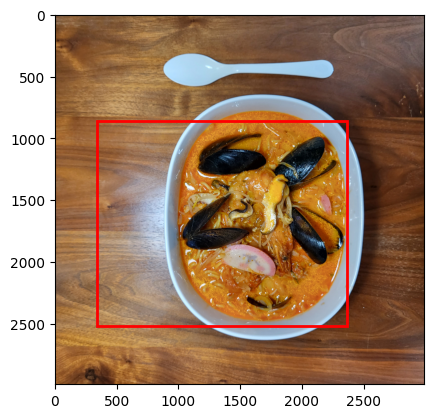

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_bounding_box(image_path, annotation):
    # 이미지 불러오기
    image = Image.open(image_path)

    # COCO 형식에 맞게 좌표 변환
    point1_x = annotation['x']
    point1_y = annotation['y']
    width = annotation['width']
    height = annotation['height']

    # 이미지와 바운딩 박스 그리기
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # 바운딩 박스 추가
    rect = patches.Rectangle((point1_x, point1_y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

    plt.show()

# 함수 호출
draw_bounding_box(TS_files[1320], data['data']['2d_annotation'])


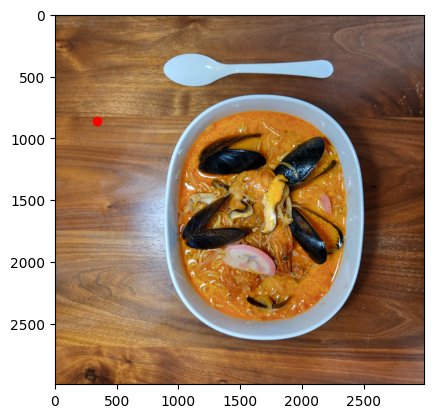

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def draw_bounding_box(image_path, annotation):
    # 이미지 불러오기
    image = Image.open(image_path)

    # COCO 형식에 맞게 좌표 변환
    point1_x = annotation['x']
    point1_y = annotation['y']
    width = annotation['width']
    height = annotation['height']

    # 이미지와 바운딩 박스 그리기
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # 바운딩 박스 그리기
    # rect = patches.Rectangle((point1_x, point1_y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    # ax.add_patch(rect)

    # 주어진 좌표에 빨간색 점 그리기
    ax.plot(point1_x, point1_y, 'ro')  # 'ro'는 빨간색 점을 의미합니다.

    plt.show()

# 함수 호출
draw_bounding_box(TS_files[1320], data['data']['2d_annotation'])


## Create Yolo Label dataset

### Train

In [77]:
import json

In [78]:
# 합치는 메뉴들 불러오기
with open("menu.json", "r") as f:
    menu= json.load(f)
label = defaultdict()
idx =0
cnt =0
for file in TL_files:
    img_name = file.split("/")[-1]
    value = img_name.split("_")[3]
    
    # 합칠 수 있는 메뉴들 합치기
    if value in menu:
        value= menu[value]
        
    # label 데이터 저장
    if value not in label.keys():
        label[value] = idx
        idx += 1
        
    # json 파일 읽기
    with open(file, 'r') as f:
        data = json.load(f)
        
    # 필요한 데이터 저장
    annotation = data['data']['2d_annotation']
    image_width = data['data']['image_info']['width']
    image_height = data['data']['image_info']['height']
    point1_x = annotation['x'] # 좌측 상단 x
    point1_y = annotation['y'] # 좌측 상단 y
    width = annotation['width']
    height = annotation['height']
    
    # convert yolo label data format
    x_center = point1_x + width / 2
    y_center = point1_y + height / 2
    
    # yolo 라벨 저장
    yolo_label = f"{label[value]} {x_center/image_width} {y_center/image_height} {width/image_width} {height/image_height}"
    txt_path = file[:-4]+"txt"
    with open(txt_path, "w") as f:
        f.write(yolo_label)
    f.close()
    cnt += 1
    if cnt % 50 ==0:
        print(yolo_label)

3 0.4804113614103819 0.49510284035259544 0.8041136141038197 0.5670910871694416
5 0.48082582376530514 0.34907420113952303 0.7328728481466235 0.2903242201993404
6 0.4833226619333949 0.4937095588042764 0.7649126152037972 0.5262493031558417
8 0.3997134670487105 0.4806590257879656 0.46131805157593114 0.316618911174785
2 0.41219693054286766 0.48088013398478596 0.7255981796381 0.5838881093123037
5 0.5226976868152969 0.34300612210150105 0.7480548758395116 0.4102038622431421
4 0.3607906454556101 0.4812386314630203 0.5763492414560185 0.5103092242058498
8 0.48575498575498577 0.30982905982905984 0.8062678062678063 0.39458689458689455
11 0.39162909272314333 0.405296279222696 0.6365978721004772 0.4878745682536112
4 0.5201062570234952 0.3772927731988505 0.5695238914157112 0.4036121695467086
4 0.3998714092800477 0.3945898175525447 0.6515712099176505 0.4133415237139908
11 0.3674351585014409 0.4445244956772334 0.61671469740634 0.45965417867435143
12 0.5103867256185258 0.4195468276275379 0.74167224923188

### Validation

In [79]:
VL_files = read_strings_from_file('VL_files.txt')
VS_files = read_strings_from_file('VS_files.txt')

In [80]:
menu_ = []
# 합치는 메뉴들 불러오기
with open("menu.json", "r") as f:
    menu= json.load(f)
# label = defaultdict()
idx =len(label)
cnt =0
for file in VL_files:
    img_name = file.split("/")[-1]
    value = img_name.split("_")[3]
    
    # 합칠 수 있는 메뉴들 합치기
    if value in menu:
        value= menu[value]
        
    # label 데이터 저장
    if value not in label.keys():
        menu_.append(value)
        label[value] = idx
        idx += 1
        
    # json 파일 읽기
    with open(file, 'r') as f:
        data = json.load(f)
        
    # 필요한 데이터 저장
    annotation = data['data']['2d_annotation']
    image_width = data['data']['image_info']['width']
    image_height = data['data']['image_info']['height']
    point1_x = annotation['x'] # 좌측 상단 x
    point1_y = annotation['y'] # 좌측 상단 y
    width = annotation['width']
    height = annotation['height']
    
    # convert yolo label data format
    x_center = point1_x + width / 2
    y_center = point1_y + height / 2
    
    # yolo 라벨 저장
    yolo_label = f"{label[value]} {x_center/image_width} {y_center/image_height} {width/image_width} {height/image_height}"
    txt_path = file[:-4]+"txt"
    with open(txt_path, "w") as f:
        f.write(yolo_label)
    f.close()
    cnt += 1
    if cnt % 50 ==0:
        print(yolo_label)

1 0.5060318482695835 0.395187506933662 0.6986148189728865 0.3752717858110055
2 0.47274632043202997 0.5868102764964843 0.7544479416924146 0.5675743155819664
4 0.3983197698483408 0.38320435790977764 0.7573280206683821 0.4309919514607753
5 0.51318359375 0.64501953125 0.7431640625 0.5478515625
8 0.5181268882175226 0.5629405840886202 0.7371601208459213 0.5639476334340382
9 0.4887892376681617 0.30381165919282516 0.776905829596413 0.4708520179372198
2 0.5005630630630632 0.30968468468468474 0.7173423423423425 0.45720720720720726
10 0.34578544061302685 0.4540229885057472 0.5852490421455939 0.48659003831417635
6 0.49396947246010314 0.5046836535534512 0.6354749116346214 0.5027006404402358
4 0.34290953545232283 0.4388753056234721 0.6760391198044011 0.484107579462103
11 0.4905081164772943 0.5882249264261791 0.8229213368495543 0.593845716485405
685 0.3860398860398861 0.5071225071225072 0.6666666666666667 0.5242165242165241
4 0.41475095785440613 0.3769157088122605 0.6599616858237549 0.485632183908045

In [83]:
# label mapping 저장
import json
with open("label_mapping_data.json", "w") as json_file:
    # json.dump(label, json_file, indent=4)

### Valid에만 있는 데이터들

In [ ]:
'누드김밥': 0,
 '로제떡볶이': 1,
 '불고기피자(팬)': 2,
 '순살양념치킨': 3,
 '쫄볶이': 4,
 '치아바타샌드위치': 5,
 '포테이토피자(씬)': 6,
 '포테이토피자(팬)': 7,
 '갈비찜': 8,
 '교자만두': 9,
 '굴비찜': 10,
 '날치알초밥': 11,
 '다슬기해장국': 12,
 '만두라면': 13,
 '매생이국': 14,
 '명태찜': 15,
 '묵은지닭볶음탕': 16,
 '불족발': 17,
 '치즈스틱': 18,
 '치킨너겟': 19,
 '밤떡': 20,
 '빨미까레': 21,
 '생딸기와플': 22,
 '얼그레이까눌레': 23,
 '뮤즐리시리얼': 24,
 '크랜베리시리얼': 25,
 '블랙밀크티': 26,
 '아이스헤이즐넛아메리카노': 27,
 '아포가토': 28,
 '크림리조또': 29,
 '갈비만두': 30,
 '낙지전골': 31,
 '매생이굴국밥': 32,
 '연어회덮밥': 33,
 '씨앗호떡': 34}